In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from PIL import Image
from scipy.stats import multivariate_normal
import cv2

# Create Images

Suggestion: Use numpy.linspace() and numpy.meshgrid() to generate the images.

#### 1. Create the image of a paraboloid with one axis scaled (like an oval paraboloid).

A paraboloid can be defined as: $f(x) = x^2-y^2$

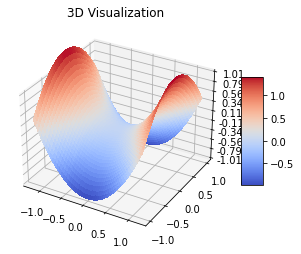

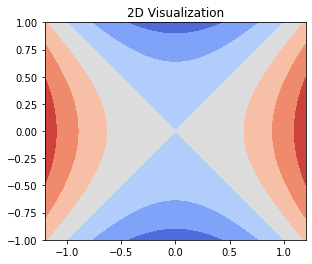

In [93]:
def f(x, y):
    return x**2 - y**2

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

scale_x = 1.2
scale_y = 1

t = np.linspace(-1, 1, 100)
x, y = np.meshgrid(t * scale_x, t * scale_y)

z = f(x, y)

surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title('3D Visualization')
plt.show()

plt.contourf(x, y, z, cmap=cm.coolwarm)
plt.axis('scaled')
plt.title('2D Visualization')
plt.show()

#### 2. Create the image of a rotated sin using rotation of coordinates.

C:\Users\dudes\AppData\Local\Temp/ipykernel_15016/4170511958.py:16: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(surf, shrink=0.5, aspect=5)


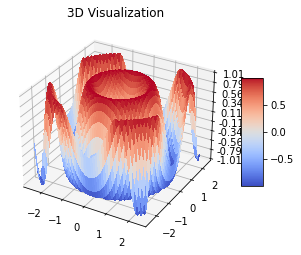

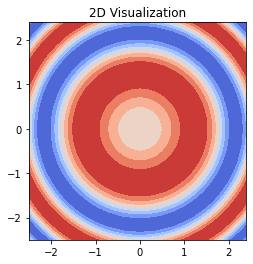

In [27]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

t = np.arange(-2.5, 2.5, 0.1)
x, y = np.meshgrid(t, t)
z = np.sin(x**2 + y**2)

ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title('3D Visualization')
plt.show()

plt.contourf(x, y, z, cmap=cm.coolwarm)
plt.axis('scaled')
plt.title('2D Visualization')
plt.show()

#### 3. Create the image of a gaussian.

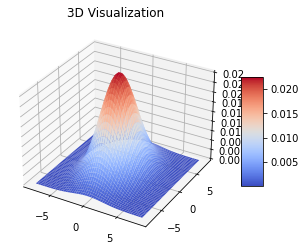

In [26]:
t = np.linspace(-8, 8, 50)
x, y = np.meshgrid(t, t)

x_mean = y_mean = 0
x_var = 5
y_var = 10

pos = np.empty(x.shape + (2,))
pos[:,:,0] = x
pos[:,:,1] = y

rv = multivariate_normal([x_mean, y_mean],[[x_var, 0], [0, y_var]])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, rv.pdf(pos), cmap=cm.coolwarm)

# Customize the z axis.
ax.set_zlim(0, 0.02)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title('3D Visualization')
plt.show()

#### 4. Create a function that generates the image of a Gaussian optionally rotate by an angle \theta and with mx, my, sx, sy as input arguments.

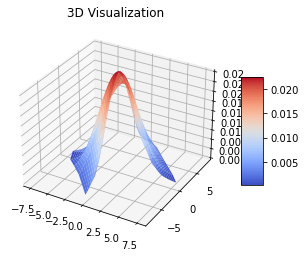

In [49]:
def rotate_gaussian(theta, mx, my, sx, sy):
    t1 = np.linspace(-mx, sx, 50)
    t2 = np.linspace(-my, sy, 50)
    x, y = np.meshgrid(t1, t2)
    xy = np.array([x, y])

    x_mean = y_mean = 0
    x_var = 5
    y_var = 10

    rotate_matrix = cv2.getRotationMatrix2D((len(t) / 2, len(t) / 2), theta, scale=1)

    rotated = cv2.warpAffine(xy, rotate_matrix, (len(x), len(y)))

    pos = np.empty(x.shape + (2,))
    pos[:,:,0] = rotated[0]
    pos[:,:,1] = rotated[1]

    rv = multivariate_normal([x_mean, y_mean],[[x_var, 0], [0, y_var]])

    return rotated[0], rotated[1], rv, pos

x, y, rv, pos = rotate_gaussian(15, 8, 8, 8, 8)
z = rv.pdf(pos)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm)

# Customize the z axis.
ax.set_zlim(0, 0.02)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title('3D Visualization')
plt.show()
